# Decision Tree Classification

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Read dataset
df_net = pd.read_csv('data/09-1-social_network_ads.csv')
df_net.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Preprocessing

In [3]:
# We don’t need the User ID column so we can drop it
df_net.drop(columns = ['User ID'], inplace=True)

In [4]:
# Label encoding (for column 'Gender')
le = LabelEncoder()
df_net['Gender']= le.fit_transform(df_net['Gender'])

In [5]:
# Correlation matrix
df_net.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


In [6]:
# Drop Gender column as insignificant data
df_net.drop(columns=['Gender'], inplace=True)

# Split data

In [7]:
# Split data into independent/dependent variables
X = df_net.iloc[:, :-1].values # columns 'Age' and 'EstimatedSalary'
y = df_net.iloc[:, -1].values  # column 'Purchased'

In [8]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = True)
X_train.shape, X_test.shape

((300, 2), (100, 2))

# Feature scaling

In [9]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Classifier with criterion entropy

In [23]:
# Decision Tree Classification
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

## Classification report

In [24]:
# Prediction
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.87

In [25]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[48 10]
 [ 3 39]]


In [26]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        58
           1       0.80      0.93      0.86        42

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



# Check for overfitting and underfitting

In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.9300
Test set score: 0.8700


## Visualize decision-trees

[Text(334.8, 380.52, 'X[0] <= 0.722\nentropy = 0.922\nsamples = 300\nvalue = [199, 101]'),
 Text(167.4, 271.8, 'X[1] <= 0.608\nentropy = 0.645\nsamples = 225\nvalue = [188, 37]'),
 Text(83.7, 163.07999999999998, 'X[0] <= -0.062\nentropy = 0.177\nsamples = 188\nvalue = [183, 5]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.396\nsamples = 64\nvalue = [59, 5]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= -0.161\nentropy = 0.571\nsamples = 37\nvalue = [5, 32]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.811\nsamples = 20\nvalue = [5, 15]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 0.46\nentropy = 0.601\nsamples = 75\nvalue = [11, 64]'),
 Text(418.5, 163.07999999999998, 'X[1] <= -0.815\nentropy = 0.747\nsamples = 47\nvalue = [10, 37]'),
 Text(376.65000000000003, 54.360000000000014, 'entropy = 

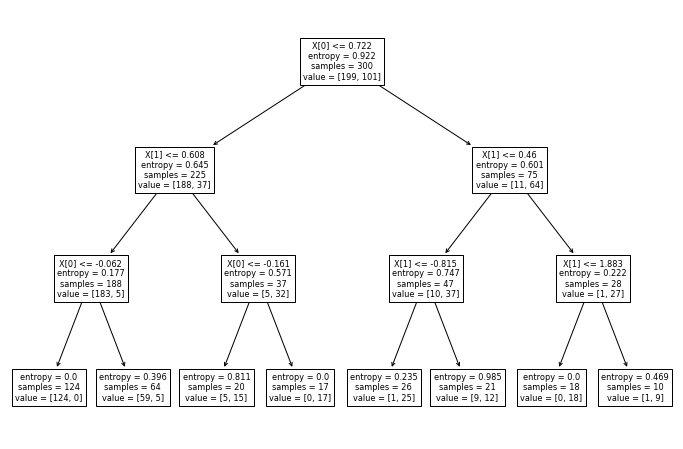

In [28]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(classifier.fit(X_train, y_train))

# Check example

In [16]:
# Predict purchase with Age(30) and Salary(87000)

print(classifier.predict(sc.transform([[30, 87000]])))

[0]


# Decision Tree Classifier with criterion Gini index

In [17]:
# Instantiate the DecisionTreeClassifier model with criterion Gini index

gini_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
gini_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
y_pred_gini = gini_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

print(f'\n\nClassification Report: \n{classification_report(y_test, y_pred_gini)}')

Confusion matrix

 [[49  9]
 [ 4 38]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        58
           1       0.81      0.90      0.85        42

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gini_classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gini_classifier.score(X_test, y_test)))

Training set score: 0.9333
Test set score: 0.8700


[Text(334.8, 380.52, 'X[0] <= 0.722\ngini = 0.447\nsamples = 300\nvalue = [199, 101]'),
 Text(167.4, 271.8, 'X[1] <= 0.608\ngini = 0.275\nsamples = 225\nvalue = [188, 37]'),
 Text(83.7, 163.07999999999998, 'X[0] <= -0.062\ngini = 0.052\nsamples = 188\nvalue = [183, 5]'),
 Text(41.85, 54.360000000000014, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.144\nsamples = 64\nvalue = [59, 5]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= -0.161\ngini = 0.234\nsamples = 37\nvalue = [5, 32]'),
 Text(209.25, 54.360000000000014, 'gini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(292.95, 54.360000000000014, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(502.20000000000005, 271.8, 'X[0] <= 0.918\ngini = 0.25\nsamples = 75\nvalue = [11, 64]'),
 Text(418.5, 163.07999999999998, 'X[1] <= -0.503\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'

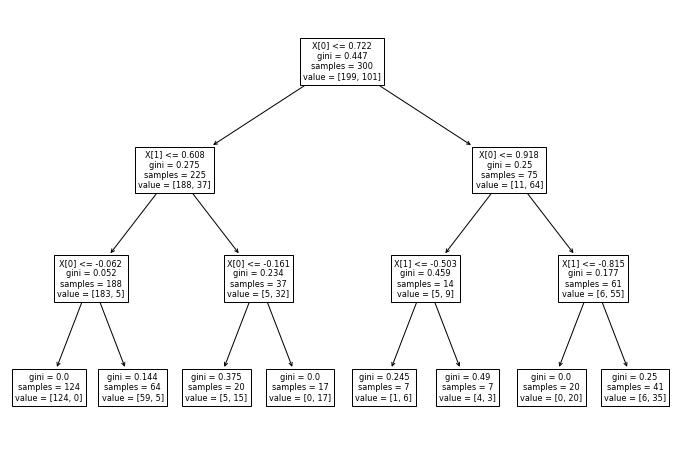

In [20]:
plt.figure(figsize=(12,8))
tree.plot_tree(gini_classifier.fit(X_train, y_train))

In [21]:
# Predict purchase with Age(30) and Salary(87000)

print(classifier.predict(sc.transform([[30, 87000]])))

[0]
